## TP1 Deep Learning : Victor Marchais

### 1 Getting Started :

In [1]:
import keras

Using TensorFlow backend.


(5184,)
6


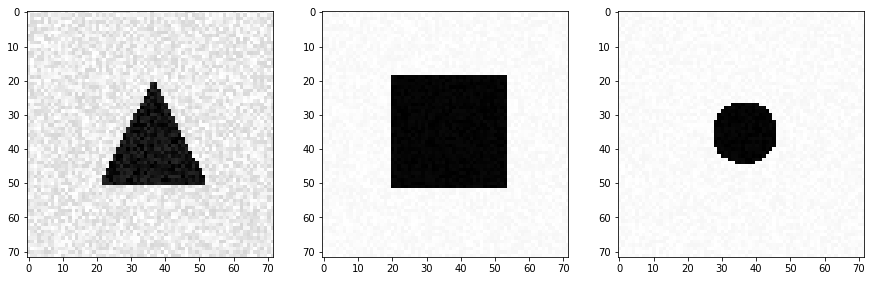

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
from tp import *

### 2 Simple Classification

In [4]:
[X_train, Y_train] = generate_dataset_classification(300, 20)
# 2 : triangle
# 1 : Circle
# 0 : Rectangle

Creating data:
0
100
200


In [5]:
Y_train

array([1., 1., 1., 2., 0., 1., 2., 0., 1., 0., 2., 2., 2., 2., 1., 1., 1.,
       2., 0., 1., 0., 1., 1., 0., 1., 0., 2., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 2., 0., 2., 2.,
       2., 0., 1., 2., 1., 1., 1., 2., 2., 1., 1., 2., 0., 1., 0., 2., 1.,
       1., 2., 0., 1., 1., 2., 2., 2., 0., 2., 2., 2., 2., 1., 0., 0., 2.,
       0., 0., 0., 0., 0., 2., 2., 0., 2., 1., 2., 0., 1., 1., 0., 1., 1.,
       2., 2., 1., 2., 1., 1., 2., 2., 1., 1., 1., 2., 0., 0., 0., 1., 1.,
       0., 1., 0., 2., 2., 1., 2., 2., 0., 2., 1., 0., 0., 2., 0., 2., 2.,
       0., 2., 2., 2., 0., 1., 0., 2., 2., 2., 0., 0., 2., 2., 2., 0., 0.,
       1., 0., 1., 2., 0., 0., 2., 2., 1., 0., 0., 2., 0., 2., 1., 2., 2.,
       0., 1., 1., 1., 2., 1., 0., 2., 1., 1., 2., 0., 1., 2., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 2., 1., 2., 1., 0., 0., 2., 0.,
       2., 1., 1., 1., 1., 1., 1., 2., 2., 0., 1., 2., 0., 0., 2., 1., 1.,
       1., 1., 1., 0., 1.

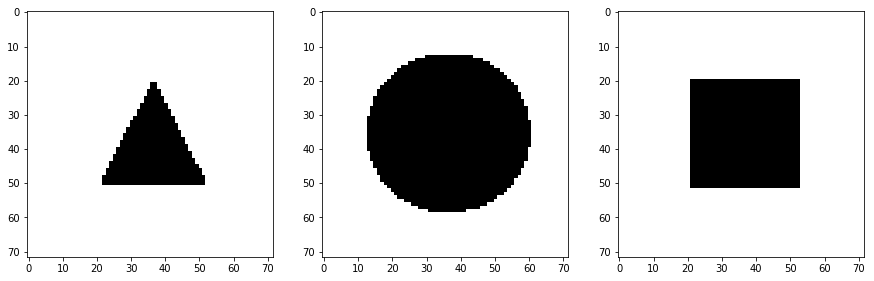

In [6]:
f, axs = plt.subplots(1,3,figsize=(15,5))
im = generate_a_triangle()[0]
axs[0].imshow(im.reshape(72,72), cmap='gray')
im = generate_a_disk()
axs[1].imshow(im.reshape(72,72), cmap='gray')
im = generate_a_rectangle()
axs[2].imshow(im.reshape(72,72), cmap='gray')
plt.show();

Simple Classifier with regression

In [7]:
#KERAS ONLY
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

model   = Sequential()
nb_neurons= 50
model = Sequential()
model.add(Dense(3, input_shape=(72*72,), activation ='softmax'))

In [8]:
from keras.optimizers import SGD
x_train = X_train#.reshape(X_train.shape[0], 72,72)
y_train = keras.utils.to_categorical(Y_train, 3)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)
model.fit(x_train, y_train, batch_size=32, epochs=100);

Epoch 1/100
300/300 [==============================] - 0s 419us/step - loss: 9.1622
Epoch 2/100
300/300 [==============================] - 0s 48us/step - loss: 10.2619
Epoch 3/100
300/300 [==============================] - 0s 44us/step - loss: 10.2619
Epoch 4/100
300/300 [==============================] - 0s 44us/step - loss: 10.2619
Epoch 5/100
300/300 [==============================] - 0s 46us/step - loss: 10.2619
Epoch 6/100
300/300 [==============================] - 0s 45us/step - loss: 10.2619
Epoch 7/100
300/300 [==============================] - 0s 45us/step - loss: 10.2619
Epoch 8/100
300/300 [==============================] - 0s 45us/step - loss: 10.2619
Epoch 9/100
300/300 [==============================] - 0s 48us/step - loss: 10.2619
Epoch 10/100
300/300 [==============================] - 0s 44us/step - loss: 10.2619
Epoch 11/100
300/300 [==============================] - 0s 44us/step - loss: 10.2619
Epoch 12/100
300/300 [==============================] - 0s 47us/step - los

300/300 [==============================] - 0s 41us/step - loss: 10.2619
Epoch 98/100
300/300 [==============================] - 0s 45us/step - loss: 10.2619
Epoch 99/100
300/300 [==============================] - 0s 39us/step - loss: 10.2619
Epoch 100/100
300/300 [==============================] - 0s 39us/step - loss: 10.2619


In [9]:
X_test = generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0]) 
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

### 3 Visualize the weights

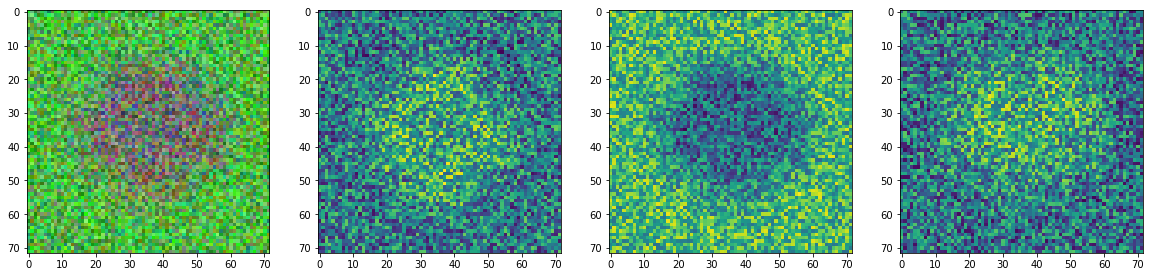

In [10]:
W = model.get_weights()
def Visu_Weights(W):
    im = W[0].reshape(72,72,3)
    c = 255/(np.max(im)-np.min(im))
    im = (c*(im - np.min(im))).astype(int)
    f, axs = plt.subplots(1,4,figsize=(20,5))

    axs[0].imshow(im)
    axs[1].imshow(im[:,:,0])
    axs[2].imshow(im[:,:,1])
    axs[3].imshow(im[:,:,2])
Visu_Weights(W)
plt.show();

### 4 A More Difficult Classification Problem

In [40]:
[X_train, Y_train] = generate_dataset_classification(300,20,True)
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
100
200
Creating data:
0
100
200


In [41]:
model.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 25us/step


[10.799123891194661, 0.33]

After some test we see that the classifier is very bad.

In [15]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=10);

Epoch 1/10
300/300 [==============================] - 0s 233us/step - loss: 10.2619 - acc: 0.3633
Epoch 2/10
300/300 [==============================] - 0s 51us/step - loss: 10.2619 - acc: 0.3633
Epoch 3/10
300/300 [==============================] - 0s 48us/step - loss: 10.2619 - acc: 0.3633
Epoch 4/10
300/300 [==============================] - 0s 41us/step - loss: 10.2619 - acc: 0.3633
Epoch 5/10
300/300 [==============================] - 0s 45us/step - loss: 10.2619 - acc: 0.3633
Epoch 6/10
300/300 [==============================] - 0s 50us/step - loss: 10.2619 - acc: 0.3633
Epoch 7/10
300/300 [==============================] - 0s 49us/step - loss: 10.2619 - acc: 0.3633
Epoch 8/10
300/300 [==============================] - 0s 49us/step - loss: 10.2619 - acc: 0.3633
Epoch 9/10
300/300 [==============================] - 0s 43us/step - loss: 10.2619 - acc: 0.3633
Epoch 10/10
300/300 [==============================] - 0s 45us/step - loss: 10.2619 - acc: 0.3633


300/300 [==============================] - 0s 88us/step


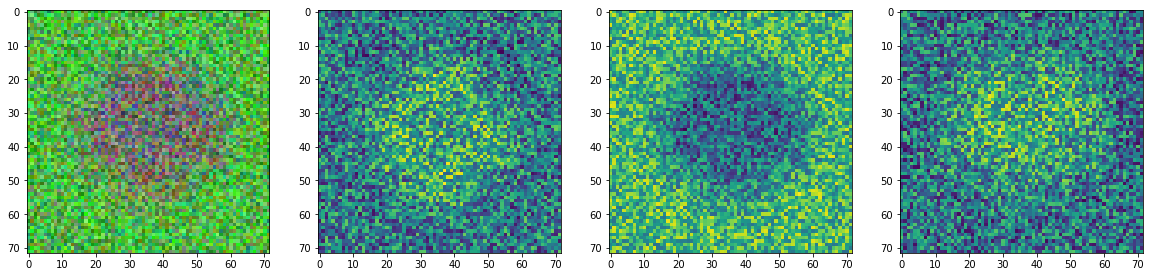

In [16]:
model.evaluate(X_test, Y_test)
W = model.get_weights()
Visu_Weights(W)

In [42]:
from keras.layers import Conv2D, MaxPool2D, Flatten
# Model
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(5,5), activation="relu"))
model2.add(MaxPool2D(pool_size=(3,3)))
model2.add(Flatten())
model2.add(Dense(3, activation ='softmax'))
#Dataset
x_train = X_train.reshape(X_train.shape[0], 72,72, 1)
y_train = keras.utils.to_categorical(Y_train, 3)

x_test = X_test.reshape((X_test.shape[0], 72,72, 1))
Y_test = np.where(Y_test==1)[1]
y_test = keras.utils.to_categorical(Y_test, 3)

# Optimization
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9,nesterov=True)
model2.compile(loss='categorical_crossentropy', optimizer=sgd)
model2.fit(x_train, y_train, batch_size=32, epochs=20);

Epoch 1/20
300/300 [==============================] - 0s 1ms/step - loss: 1.0971
Epoch 2/20
300/300 [==============================] - 0s 877us/step - loss: 1.0361
Epoch 3/20
300/300 [==============================] - 0s 873us/step - loss: 0.9482
Epoch 4/20
300/300 [==============================] - 0s 837us/step - loss: 0.8538
Epoch 5/20
300/300 [==============================] - 0s 831us/step - loss: 0.7874
Epoch 6/20
300/300 [==============================] - 0s 825us/step - loss: 0.6930
Epoch 7/20
300/300 [==============================] - 0s 837us/step - loss: 0.6014
Epoch 8/20
300/300 [==============================] - 0s 833us/step - loss: 0.5423
Epoch 9/20
300/300 [==============================] - 0s 851us/step - loss: 0.5158
Epoch 10/20
300/300 [==============================] - 0s 836us/step - loss: 0.4440
Epoch 11/20
300/300 [==============================] - 0s 837us/step - loss: 0.4474
Epoch 12/20
300/300 [==============================] - 0s 838us/step - loss: 0.4022
Epo

In [43]:
model2.evaluate(x_train, y_train)

300/300 [==============================] - 0s 603us/step


0.1548072240749995

### 5 A Regression Problem

In [18]:
[X_train, Y_train] = generate_dataset_regression(300, 20)

Creating data:
0
100
200


In [21]:
def trigOrder(Pts):
    X = [Pts[2*i] for i in range(3)]
    Y = [Pts[2*i+1] for i in range(3)]
    X -= np.mean(X)
    Y -= np.mean(Y)
    print(X,Y)
#    for i in range(3):
#        x,y = Pts[2*i,2*i+1]

trigOrder(Y_train[0])

[ 0.2533056  -0.39072374  0.13741814] [-0.18567571  0.15201178  0.03366393]


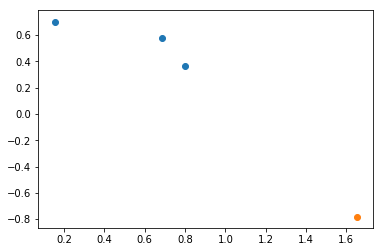

In [85]:
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=(5,5), activation="relu"))
model2.add(MaxPool2D(pool_size=(3,3)))
model2.add(Flatten())
model2.add(Dense(3, activation ='softmax'))

In [45]:
# GENERATE A DRAWING DRAW U and V coordinates with some noise
# Generate : generate a form
# free_location : generated "anywhere", false is in the center

train, Y_train] = generate_dataset_classification(300, 20) 
† Build and train a linear classiﬁer in Keras to classify a image into one of the three possible categories (i.e. rectangle, disk, triangle).
Try using the stochastic gradient descent optimizer, then the Adam optimizer. 

Hints: You will have to use the following functions: 
Sequential, add, Dense (do not forget the activation), 
compile, fit, np_utils.to_categorical. 

For the Adam optimizer, I used a batch size of 32. You should use a small number of epochs when debugging to see if the optimization seems to converge correctly. You can check your classiﬁer using the following code (for example):
X_test = generate_a_disk() X_test = X_test.reshape(1, X_test.shape[0]) model.predict(X_test)

In [48]:
# TEST ON MINST
from keras.datasets import mnist

(X_train, y_train), (X_est, y_test) = mnist.load_data()
print(X_train.shape)

(60000, 28, 28)


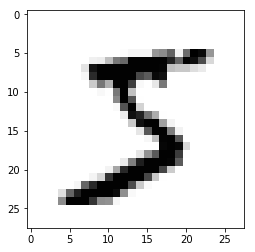

In [50]:
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
%matplotlib inline
plt.imshow(X_train[0], cmap = cm.Greys)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) X_train = X_train.astype('float32') X_train /= 255 print(X_train.shape) 
 X_test = X_test.reshape(X_test.shape[0], 28, 28, 1) X_test = X_test.astype('float32') X_test /= 255

In [2]:
def Vectorize(Pts2):
    V = np.zeros((3,2))
    for i in range(3):
        V[i] = np.array([ Pts2[(i+1)%3,0] - Pts2[i,0] , Pts2[(i+1)%3,1] - Pts2[i,1]])
    return(V)

def Center_Rectangle(Pts):
    Pts_2 = Pts.reshape(3,2)
    V = Vectorize(Pts_2)
    # Solving 
    B1 = Pts_2[0] + V[0]/2 
    A1 = np.array([ V[0,1], V[0,0]])

    B2 = Pts_2[1] + V[1]/2 
    A2 = np.array([ V[1,1], V[1,0]])    

    B3 = Pts_2[2] + V[2]/2 
    A3 = np.array([ V[2,1], V[2,0]])
    
    A = np.array( [ [A3[1],-A3[0]], [A2[1],-A2[0]]  ])
    B = np.array([ A3[1]*B3[0]-A3[0]*B3[1], A2[1]*B2[0]-A2[0]*B2[1] ])
    X = np.linalg.solve(A,B)
    plt.plot(X[0],X[1])
    print(X)
    
    A = np.array( [ [A3[1],-A3[0]], [A1[1],-A1[0]]  ])
    B = np.array([ A3[1]*B3[0]-A3[0]*B3[1], A1[1]*B1[0]-A1[0]*B1[1] ])
    X = np.linalg.solve(A,B)
    plt.scatter(X[0],X[1])
    print(X)

    plt.plot(B1[0],B1[1])
    plt.plot(B2[0],B2[1])
    plt.plot(B3[0],B3[1])
    
    A = np.array( [ [A1[1],-A1[0]], [A2[1],-A2[0]]  ])
    B = np.array([ A1[1]*B1[0]-A1[0]*B1[1], A2[1]*B2[0]-A2[0]*B2[1] ])
    X = np.linalg.solve(A,B)
    plt.scatter(X[1],X[0])
    print(X)
    
 #   plt.scatter([B1[0],B2[0],B3[0]],[B1[1],B2[1],B3[1]])
    
    for i in range(3):

        print(np.sum( (Pts_2[i]-X)**2))
    return(X)
    

C = Center_Rectangle(Y_train[0])
plt.scatter(Y_train[0].reshape(3,2)[:,0] , Y_train[0].reshape(3,2)[:,1] )
#plt.scatter(C[0],C[1])
plt.axis("scaled")
plt.show()

NameError: name 'Y_train' is not defined

In [ ]:
# TD : Transform into a shpae (N, x,x, 1)
# divide by 255

# Transform Y into categorical values (vector with only 1)

# Modify the data
# Create the model
# compile : comile, optim, 
#testing : predict

In [51]:
print(y_train.shape) 
print(y_train[0:3]) 
from keras.utils import np_utils 
y_train = np_utils.to_categorical(y_train, 10) 
print(y_train[0])

(60000,)
[5 0 4]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
